# Computer Vision

## Convolution

Before we start: **filter = kernel**

**In Mathematical Terms:** Convolution refers to a linear operation between two matrices defined by two steps:
1. Matrix elementwise multiplication (dot product)
2. Adding up the multiplication products into a single value (scalar)

**As it relates to neural networks:** A convolution within a neural network consists of multiplying an input image by a kernel, which is smaller in size, repeatedly. This convolution effect is replicated for each subset of the input image until the kernel/filter has been "convolved" against the entire output image. The resulting matrix is known as a *feature map*.

Q: Why do this? 

A: Everytime an image is convolved using a kernel, the feature map produced contains key information about the image (e.g. eges,lines, and shapes). The more convolutions we perform, with unique filters, the more we learn about the image and hence the easier it will be to classify an image.

<p align="center">
<img src='https://miro.medium.com/max/1838/1*xBkRA7cVyXGHIrtngV3qlg.png' width=900>
<img src='https://developer.nvidia.com/sites/default/files/pictures/2018/convolution-1.png' width=500 height=300>
</p>


### Convolution Layers (1D,2D,3D)

Example Keras Call:
```
Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding="valid",
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs)
```

## Pooling

**Downsampling with Pooling Layers:**
- We know convolutional layers apply a filter/kernel to images, thereby producing a feature map containing higher level features at each layer of the neural network
- The problem is these feature maps can be sensitive to position, meaning if an image in the dataset varies in position (even a little), its feature map will be different from the rest
- As a result, its a great idea to downsample the feature maps, that is to lower the feature map resolution so as to keep the important features but neglect the fine details that may confuse the model (i.e. generalize the model's knowledge)


Pooling layers are a great way to do this!
- The typical filter size used in pooling layers to down sample is (2,2) with a stride of 2. This filter essentially halves the dimensions of the feature map and decreases the overall size of the image to one quarter its original size
- For example, a pooling layer applied to a feature map of 6×6 (36 pixels) will result in an output pooled feature map of 3×3 (9 pixels).
- Features maps downsampled with pooling layers are referred to as **pooled feature maps**

### Pooling Layers

**AvgPooling vs. MaxPooling vs Global Pooling**

*Average Pooling:* Calculate the average value for each patch on the feature map.

*Maximum Pooling:* (or Max Pooling): Calculate the maximum value for each patch of the feature map

*Global Pooling:* Global pooling down samples the entire feature map to a single value (not typically used)

## CNN Structure
<p align="center">
<img src='https://miro.medium.com/max/1400/1*2GPKwa4nsmgnCKqXQm587A.jpeg' width=900 height=400>
</p>

**NOTE:** As our output spatial volume decreases our number of filters learned increases (a common practice)

## Datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from tensorflow.keras.datasets import fashion_mnist,mnist
from pathlib import Path

## Exploratory Data Analysis

## Fashion_mnist & Mnist Datasets

Max Pixel Value:255
Min Pixel Value:0
Avg Image Shape:(28, 28)


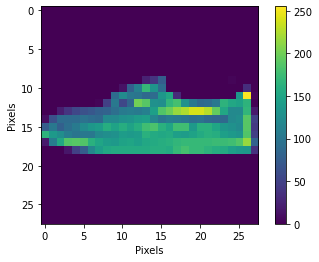

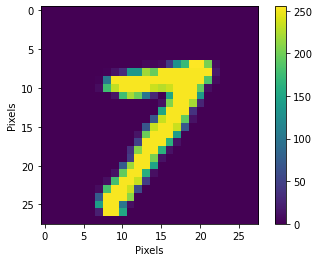

In [98]:
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()
(X_train,Y_train), (X_test,Y_test) = mnist.load_data()

print('Max Pixel Value:{}\nMin Pixel Value:{}'.format(x_train[8].max(),x_train[8].min()))
print('Avg Image Shape:{}'.format((x_train.shape[1],x_train.shape[2])))

def train_image(data,num):
    plt.figure()
    plt.imshow(data[num]) # fashion_mnist
    plt.colorbar() 
    plt.xlabel('Pixels')
    plt.ylabel('Pixels')
    plt.show()
    
train_image(x_train,40000) 
train_image(X_train,40000) 

## Brain Tumor Dataset

Max Pixel Value:255
Min Pixel Value:0


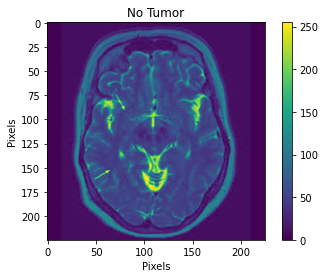

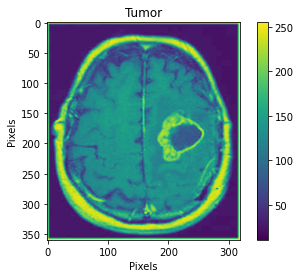

In [15]:
img_path_base = '../../../Datasets/brain_tumor_dataset'
images = []
for i in range(10):
    if i<=5:
        path = img_path_base+'/no/No{}.jpg'.format(i+1)
        image = Image.open(path)
        image = np.asarray(image.convert(mode='L'))
        images.append(image)

    else:
        path = img_path_base+'/yes/Yes{}.jpg'.format(i+1)
        image = Image.open(path)
        image = np.asarray(image.convert(mode='L'))
        images.append(image)

print('Max Pixel Value:{}\nMin Pixel Value:{}'.format(images[7].max(),images[7].min()))


def image_viz(num):
    plt.imshow(images[num])
    plt.colorbar()
    plt.ylabel('Pixels')
    plt.xlabel('Pixels')
    if num<=5:
        plt.title('No Tumor')
    else:
        plt.title('Tumor')
    plt.show()  
    
image_viz(2)
image_viz(8)

In [5]:
paths = ['../../../Datasets/brain_tumor_dataset/no','../../../Datasets/brain_tumor_dataset/yes']
dim1 = []
dim2 = []
for directory in paths:
    for file_name in Path(directory).iterdir():
        if 'DS' not in str(file_name):
            image1 = Image.open(file_name)
            dim1.append(np.asarray(image1).shape[0])
            dim2.append(np.asarray(image1).shape[1])
        

avg_dim1 = int(sum(dim1)/len(dim1))
avg_dim2 = int(sum(dim2)/len(dim2))
avg_shape = (avg_dim1,avg_dim2)
print('Avg Image Shape:{}'.format(avg_shape))

Avg Image Shape:(386, 354)


In [6]:
def data_gen(path):
    datagen = ImageDataGenerator(rescale=1.0/255.0,validation_split=.15)

    train_iterator = datagen.flow_from_directory(path,batch_size=15,target_size=(386, 354),
    subset='training',color_mode='grayscale',class_mode='binary')
    
    val_iterator = datagen.flow_from_directory(path,batch_size=5,target_size=(386, 354),
    subset='validation',color_mode='grayscale',class_mode='binary')
    return train_iterator,val_iterator

train_it,val_it = data_gen('../../../Datasets/brain_tumor_dataset')

Found 216 images belonging to 2 classes.
Found 37 images belonging to 2 classes.


In [7]:
print(train_it.class_indices)

{'no': 0, 'yes': 1}


In [8]:
features, target = next(train_it)
print(target)

[1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.]


## Chest CT Dataset (Cancer)

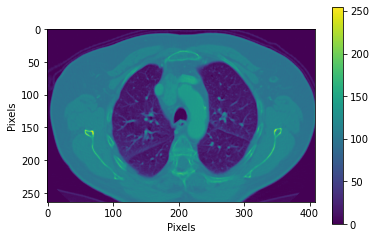

In [12]:
def image_viz(image):
    plt.imshow(image)
    plt.colorbar()
    plt.ylabel('Pixels')
    plt.xlabel('Pixels')
    plt.show()

img_path_base = '../../../Datasets/chest_cancer_dataset/train'
train_paths = ['/adenocarcinoma','/large.cell.carcinoma','/normal','/squamous.cell.carcinoma']

img_path = '../../../Datasets/chest_cancer_data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000000 (6).png'
img_path2 ='Datasets/chest_cancer_data/train/normal/2 - Copy.png'

image = Image.open(img_path)
image = np.asarray(image.convert(mode='L'))
image_viz(image)

In [14]:
image1 = Image.open(file_name)


avg_dim1 = int(sum(dim1)/len(dim1))
avg_dim2 = int(sum(dim2)/len(dim2))
avg_shape = (avg_dim1,avg_dim2)
print('Avg Image Shape:{}'.format(avg_shape))

Avg Image Shape:(386, 354)


In [3]:
img_path = '../../../Datasets/chest_cancer_data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000000 (6).png'
img = Image.open(img_path)
img = np.asarray(img.convert(mode='L'))

df = pd.DataFrame(img)
pix_stats = dict(df.describe())
pix_stats

TypeError: open() missing 1 required positional argument: 'fp'